# Polynomial Regression Overfitting

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
%matplotlib inline

import statsmodels.api as sm

In [2]:
#Load the dataset
data = pd.read_csv("../data/Real estate valuation data set .csv",index_col=0)

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 414


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8


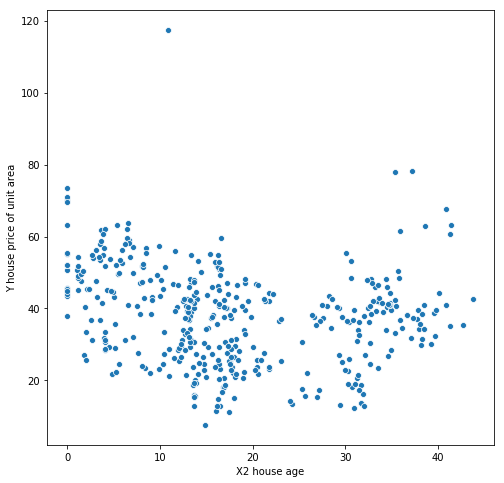

In [3]:
#For simplicity we will only consider 2 variables: house age and number of convenience stores
X = data['X2 house age']
Y = data['Y house price of unit area']

#Relationship with explanatory variables
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X )


In [5]:
x = data[['X2 house age']]
x = sm.add_constant(X)
y = np.log(data['Y house price of unit area'])

model = sm.OLS(y,x).fit()

#model.summary()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


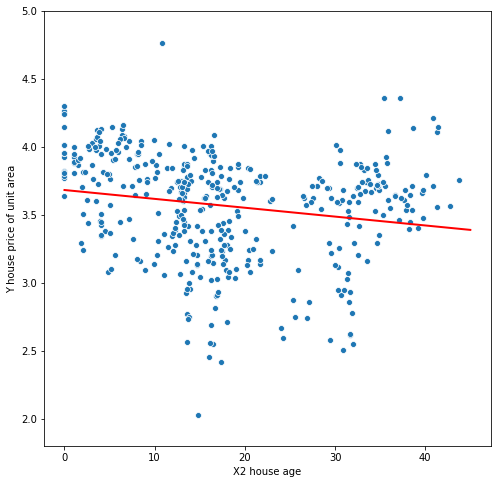

In [9]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
plt.ylim(1.8, 5)
sns.scatterplot(y=y,x=x['X2 house age'])

x1 = np.linspace(0, 45, 1000)
x_plot = pd.DataFrame(data=x1, columns=["x"])
x_plot = sm.add_constant(x_plot)

y_plot = model.predict(x_plot)

plt.plot(x_plot['x'],y_plot, 'r-', lw=2)


#plt.plot([0, 40],[3.6822, 40*(-0.0065)+3.6822], 'r-', lw=2)

In [88]:
X = data[['X2 house age']]
X['x2'] = X['X2 house age']**2
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

model = sm.OLS(Y,X).fit()

#model.summary()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


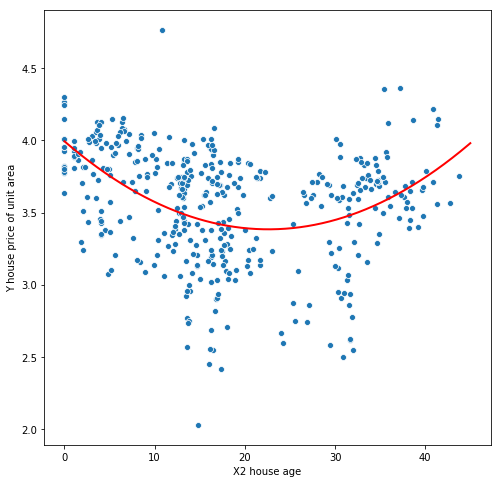

In [90]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X['X2 house age'] )

x_plot['x2'] = x_plot['x']**2

x_plot

# calculate the y value for each element of the x vector
#y = 0.0012*x**2 - 0.0539*x + 3.9934 
y_plot = model.predict(x_plot)

plt.plot(x_plot['x'],y_plot, 'r-', lw=2)

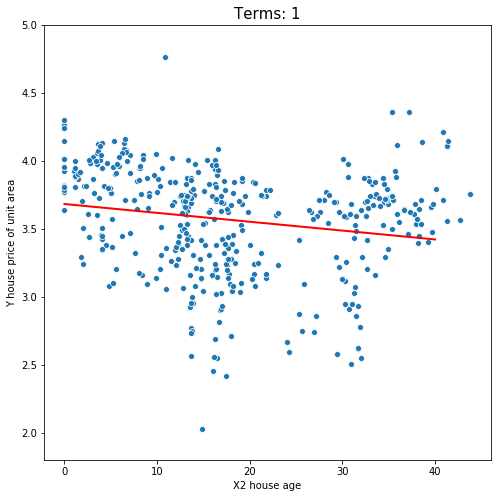

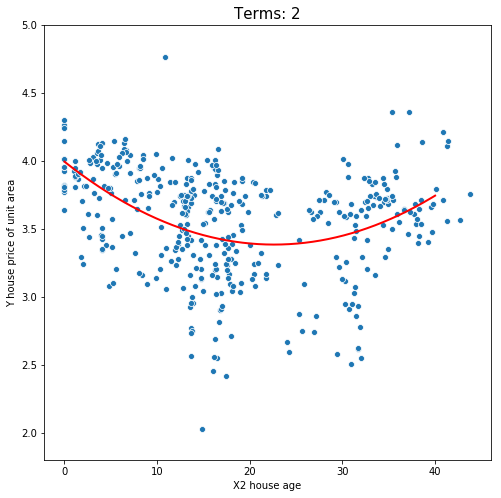

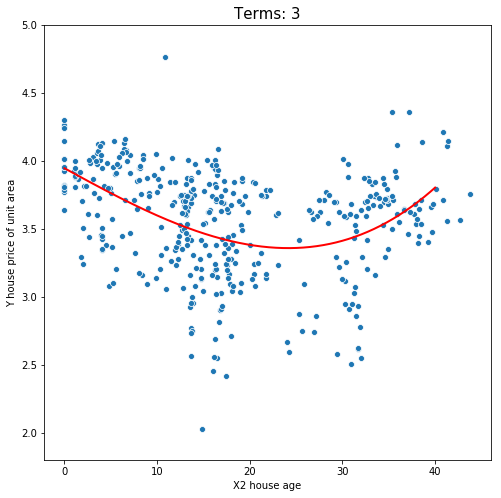

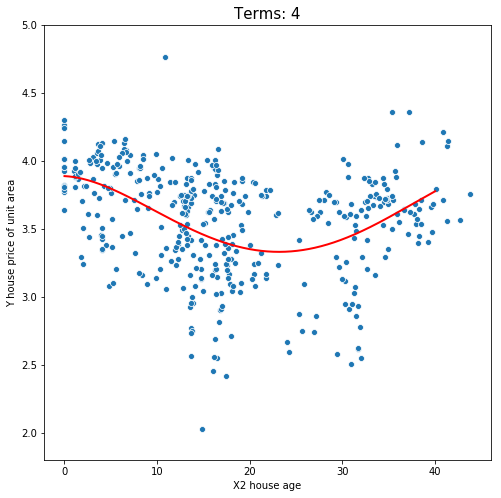

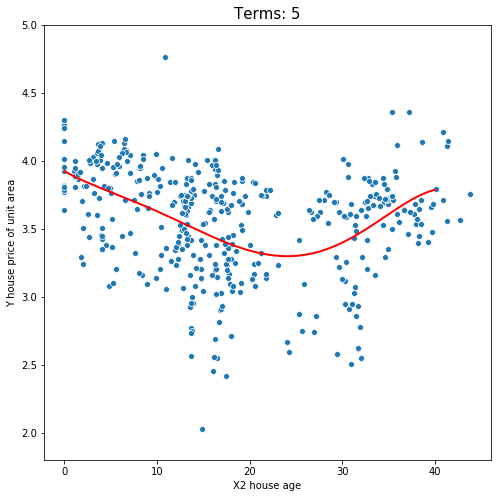

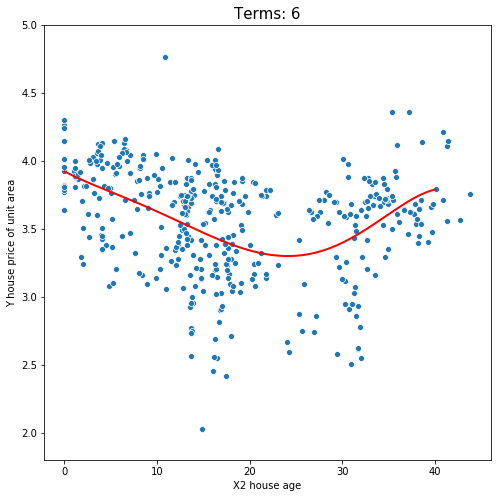

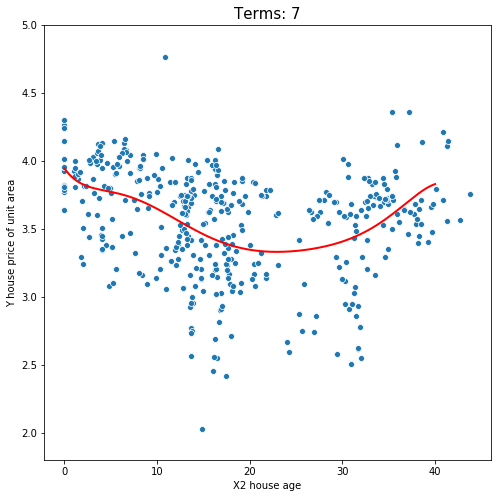

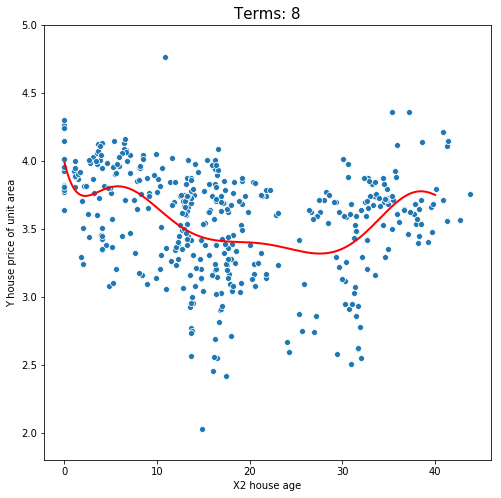

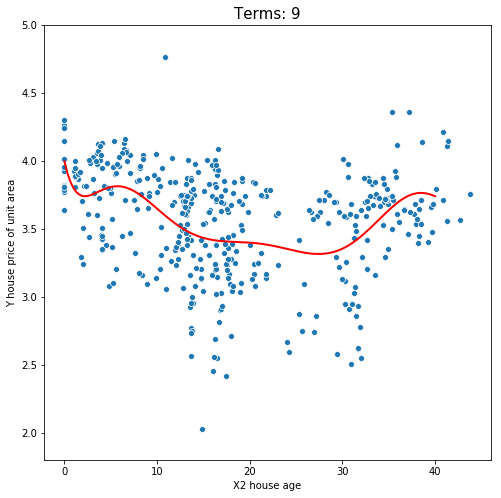

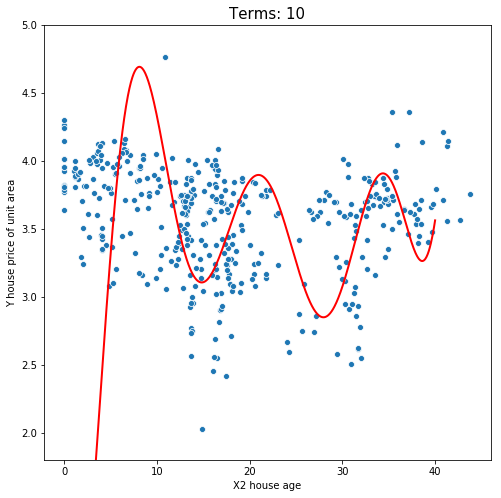

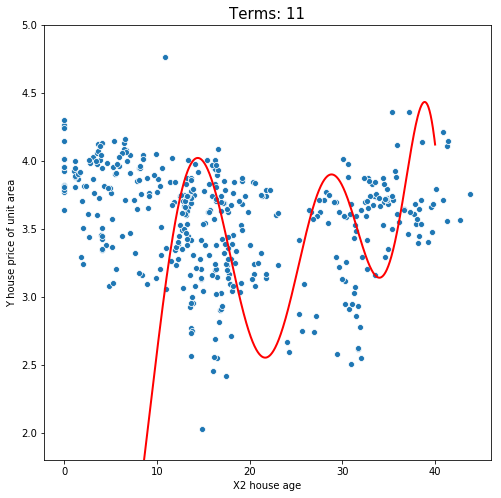

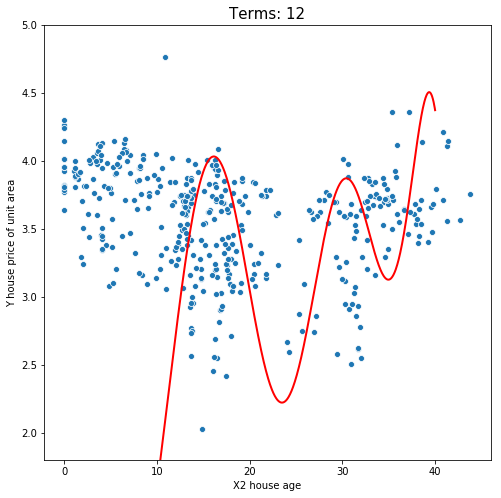

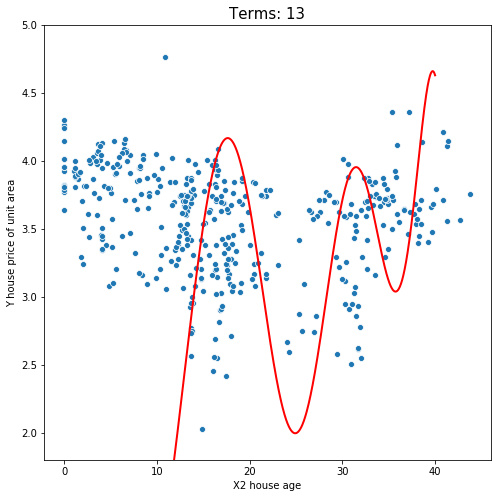

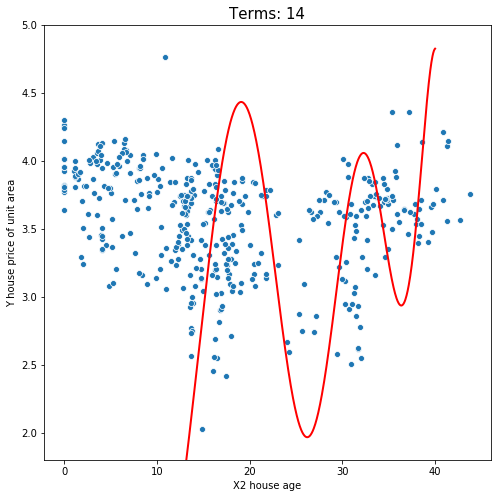

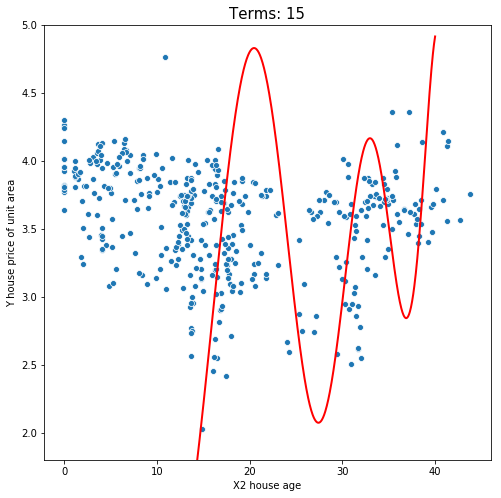

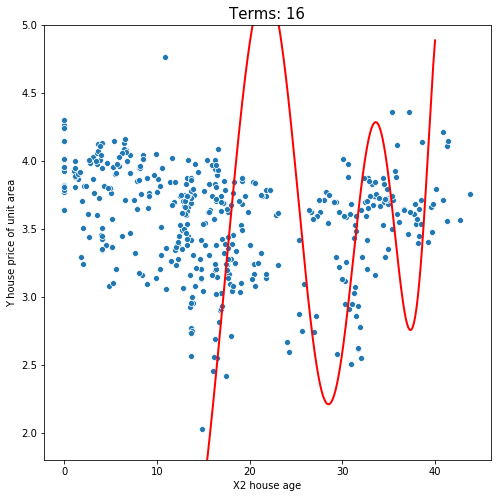

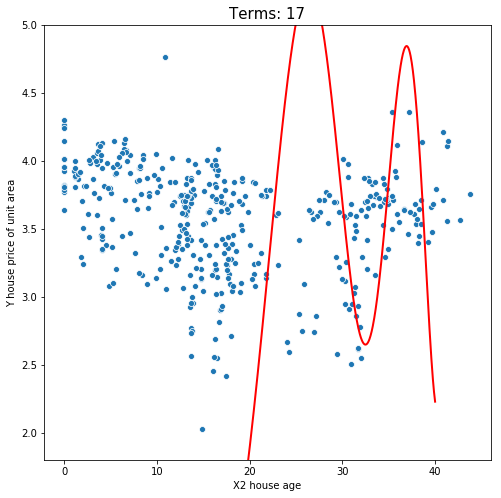

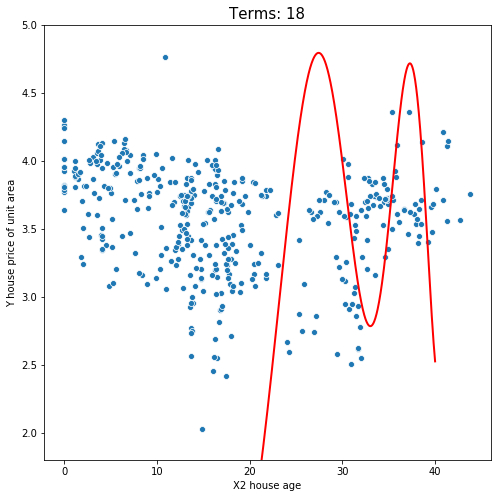

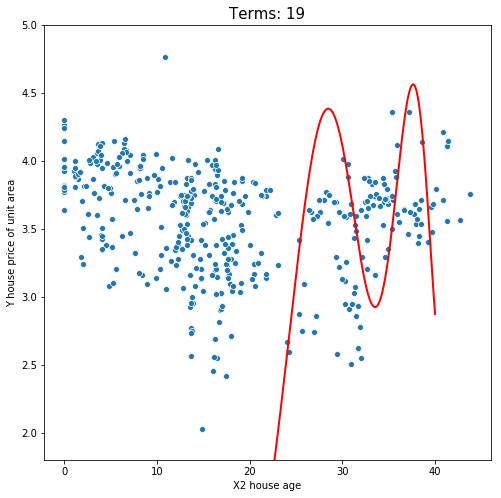

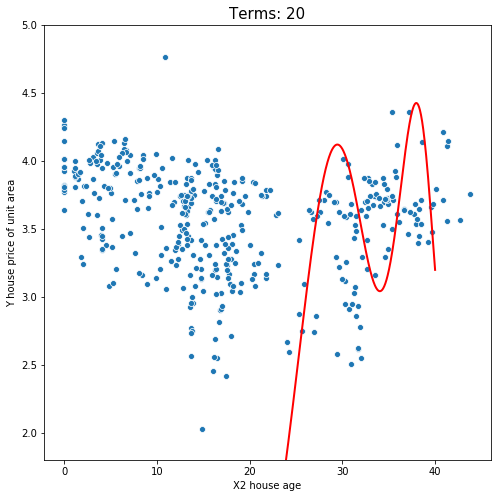

In [14]:
x = data[['X2 house age']]
x = sm.add_constant(x)
y = np.log(data['Y house price of unit area'])


x1 = np.linspace(0, 40, 1000)
x_plot = pd.DataFrame(data=x1, columns=["x"])
x_plot = sm.add_constant(x_plot)


for i in range(1,21):
    if i != 1:
        x['x{}'.format(i)] = x['X2 house age']**i
        
        x_plot['x{}'.format(i)] = x_plot['x']**i

    #fit model 
    model = sm.OLS(y,x).fit()

    #get predictions 
    y_plot = model.predict(x_plot)
    
    
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
    plt.ylim(1.8, 5)
    plt.title('Terms: {}'.format(i),size =15)
    sns.scatterplot(y=y,x=x['X2 house age'])

    plt.plot(x_plot['x'],y_plot, 'r-', lw=2)
    plt.savefig('../figures/poly/plot{}.png'.format(i),format='png', dpi=150)
